In [ ]:
!pip install tensorflow==2.10.0
!pip install tensorflow-gpu==2.10.0
!pip install tensorflow-datasets==4.8.3
!pip install opencv-python==4.8.1.78
!pip install QKeras==0.9.0
!pip install matplotlib==3.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 42.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.9.3
    Uninstalling tensorflow-datasets-4.9.3:
      Successfully uninstalled tensorflow-datasets-4.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyparser: filename=pyparser-1.0-py3-none-any.whl size=4913 sha256=fbf8bca58262db57300a853706e3e77ab807e391785dcbc5ca53662d1a9878a4
  Stored in directory: /root/.cache/pip/wheels/25/87/78/ff95e8a747dc534fbd199fb3ea06d80935bc87e44567bbdb31
  Created wheel for parse: filename=parse-1.6.5-py3-none-any

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
import cv2
import matplotlib.pyplot as plt
import os

# **Utils**

In [ ]:
def fp_quantize(x, w, f):
    """
    fixed point post quantization.
    Args:
        x: floating point (can be list) 32 bit input
        w: bit width of the target fixed point
        f: fraction bit width of the target fixed point
    Returns:
        the desired fixed point quantized of the input x
    """
    i = w - f
    max = float(2 ** (i - 1) - 2 ** (-f))
    min = float(-2 ** (i - 1))
    n = float(2 ** f)
    xx = np.floor(x * n + 0.5) / n
    clipped = np.clip(xx, a_min=min, a_max=max)
    return clipped

In [ ]:
def FPToHex(x, w = 8, f = 7):
    """
    Converts a given Fixed point number to its Hex representation.
    Args:
        x: fixed point having w bits and f bits fraction input
        w: bit width of the input
        f: fraction bit width of the input
    Returns:
        Hex representation of input
    """
    x_fix = x
    x_fix = x_fix * pow(2, f)
    x_fix = int(x_fix)
    if(x_fix < 0):
        binary = bin(x_fix+(1<<w))
    else:
        binary = bin(x_fix)
    return hex(int(binary, 2))[2:]

def WriteFixPToFile(file_name, data_fp, w = 8, f = 7, mode = "w"):
    """
    Writes given Fixed point numbers specified by w bits width and f bits fraction to the given file name.
    Args:
        file_name: file name to save the output
        data_fp: fixed point list having w bits and f bits fraction input
        w: bit width of the input
        f: fraction bit width of the input
    Returns:
        None
    """
    with open(file_name, mode) as file:
        for i in range(data_fp.shape[0]):
            file.write(str(FPToHex(data_fp[i], w=w, f=f))+'\n')

Use below function if needed (like verifying outputs or debugging).

In [ ]:
def twos_complement(bin_num):
    """
    calculates the 2's complement of the given binary number.
    Args:
        bin_num: binary number in string format
    Returns:
        the binary representation after performing 2's complement
    """

    # Perform 2's complement on the binary number
    flipped = ''
    for bit in bin_num:
        flipped += '0' if bit == '1' else '1'
    comp_num = int(flipped, 2) + 1

    return bin(comp_num)[2:].zfill(len(bin_num))

def fixed_point_to_float(bin_num, w=16, f=14):
    """
    Converts a fixed point number given in binary representation to its decimal floating point.
    Args:
        bin_num: binary number in string format
        w: bit width of the input
        f: fraction bit width of the input
    Returns:
        decimal floating point
    """
        # Check if the number is negative
    sign_bit = int(bin_num[0])
    if sign_bit:
        bin_num = twos_complement(bin_num, w, f)

    # Split the binary number into integer and fractional parts
    if f > 0:
        if f == w:
            float_num = int(bin_num, 2) / 2**f
        else:
            int_part = int(bin_num[:-f], 2)
            frac_part = int(bin_num[-f:], 2) / 2**f
            float_num = int_part + frac_part
    else:
        int_part = int(bin_num, 2)
        float_num = int_part

    # Apply the sign to the floating point number if it was negative
    if sign_bit:
        float_num = -float_num

    return float_num

def hex_to_fixed_point_decimal(hex_value, w, f):
    """
    Converts a fixed point number given in hex representation to its decimal floating point.
    Args:
        hex_value: hex number in string format
        w: bit width of the input
        f: fraction bit width of the input
    Returns:
        decimal floating point
    """
    binary_value = bin(int(hex_value, 16))[2:]

    # # Determine the sign bit
    binary_value = binary_value.zfill(w)

    # return decimal_value
    return fixed_point_to_float(binary_value, w, f)

# **Data Preparation**

load and normalize data images:

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


display images:

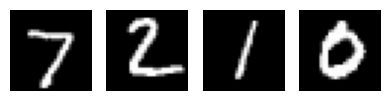

In [ ]:
plt.figure(figsize=(4, 4))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

network constants:

In [ ]:
LATENT_SAPCE_DIM = 32
LATENT_SPACE_WIDTH = 4
LATENT_SAPCE_HEIGHT = 8

reshape images to one dimensional shape:

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# **Training**

define the autoencoder model:

In [ ]:
input_img = keras.Input(shape=(x_train.shape[1],))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(LATENT_SAPCE_DIM, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

define encoder:

In [ ]:
encoder = keras.Model(input_img, encoded)

define decoder:

In [ ]:
encoded_input = keras.Input(shape=(LATENT_SAPCE_DIM,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer)

train the model:

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 8s 22ms/step - loss: 0.0886 - val_loss: 0.0845
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0840 - val_loss: 0.0827
Epoch 3/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0827 - val_loss: 0.0818
Epoch 4/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0819 - val_loss: 0.0810
Epoch 5/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0813 - val_loss: 0.0808
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0809 - val_loss: 0.0803
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0805 - val_loss: 0.0803
Epoch 8/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0802 - val_loss: 0.0799
Epoch 9/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0800 - val_loss: 0.0796
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.079

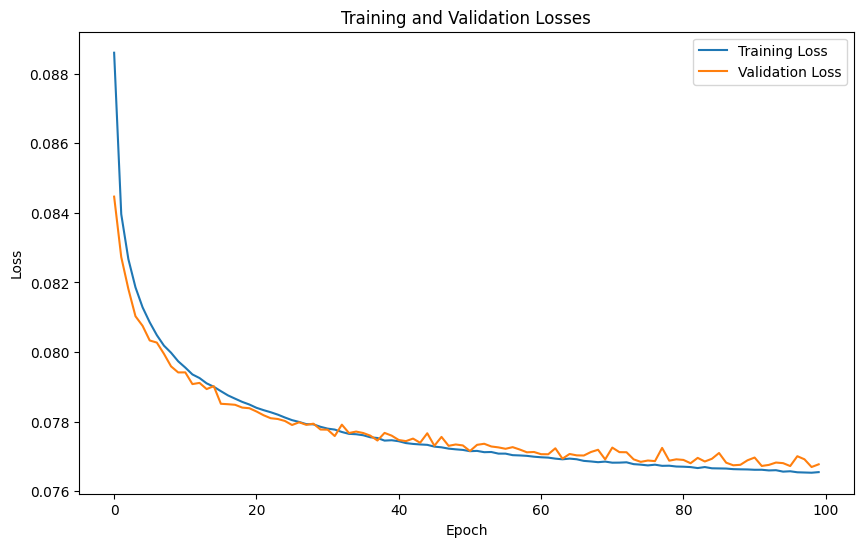

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

get the output of the decoder from x_test input:

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


display the initial images and their corresponding decoded ones:

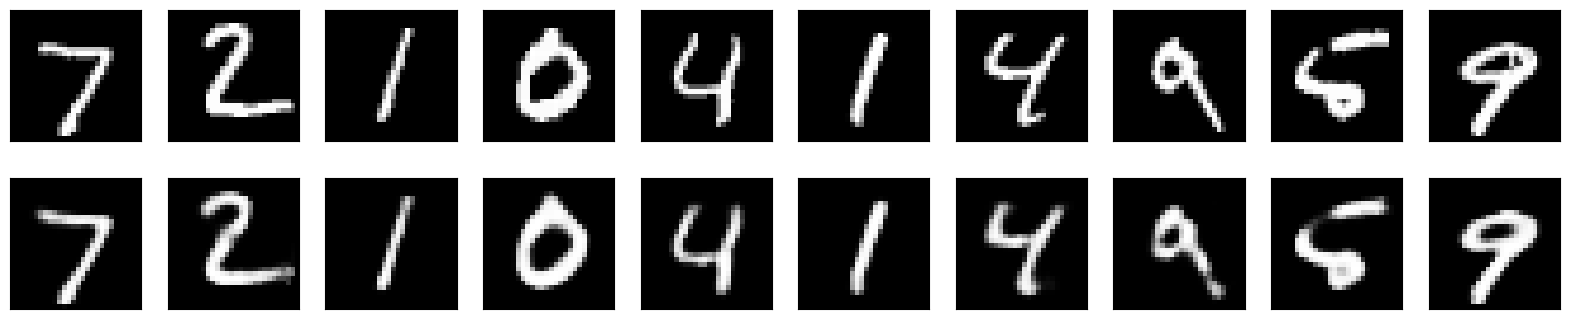

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

display the images in latent space (output of encoder):

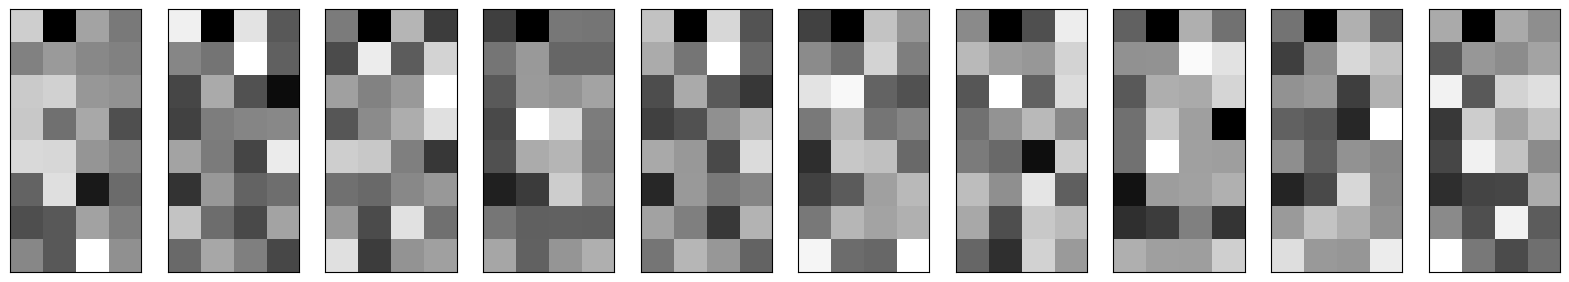

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((LATENT_SPACE_WIDTH, LATENT_SAPCE_HEIGHT)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

apply noise to the dataset:

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

display noisy images:

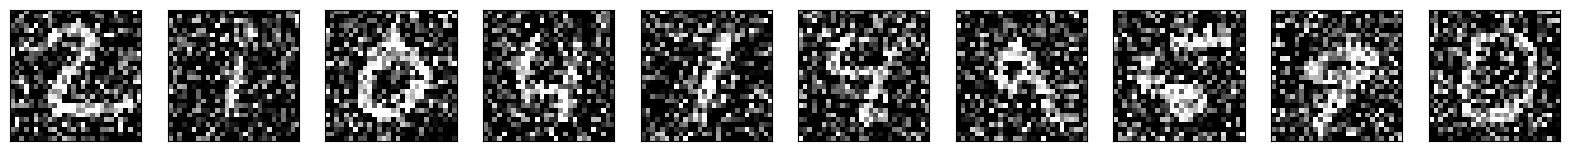

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

train the model based on noisy input and real target:

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1500 - val_loss: 0.1265
Epoch 2/100
469/469 [==============================] - 5s 12ms/step - loss: 0.1236 - val_loss: 0.1201
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1199 - val_loss: 0.1182
Epoch 4/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1183 - val_loss: 0.1175
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1173 - val_loss: 0.1164
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1166 - val_loss: 0.1161
Epoch 7/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1161 - val_loss: 0.1154
Epoch 8/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1157 - val_loss: 0.1153
Epoch 9/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1153 - val_loss: 0.1148
Epoch 10/100
469/469 [==============================] - 8s 17ms/step - loss: 0.114

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
encoded_input = keras.Input(shape=(LATENT_SAPCE_DIM,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer)


In [ ]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


show the noisy images and their corresponding denoised one using the trained model:

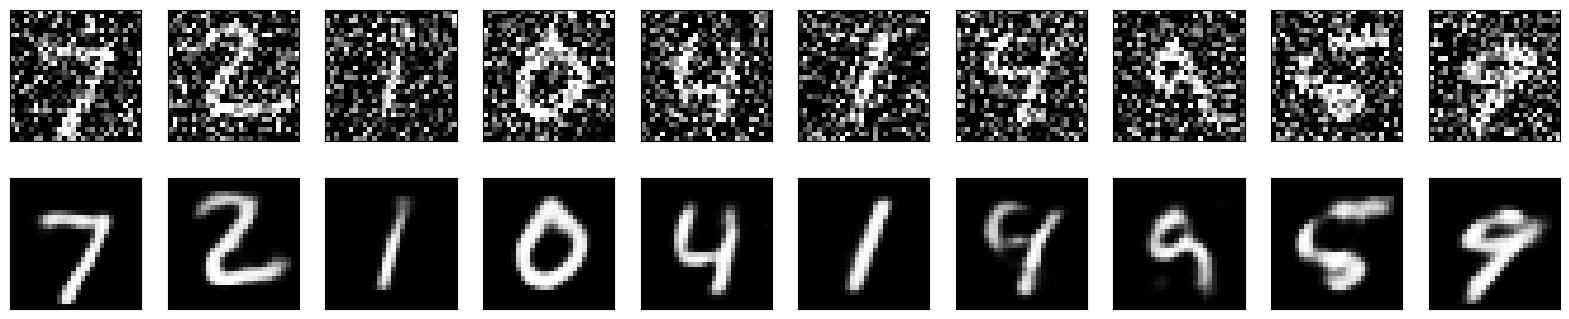

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

save the models:

In [ ]:
autoencoder.save("autoencoder.h5")
encoder.save("encoder.h5")
decoder.save("decoder.h5")

plot histogram of the weights of first layer:

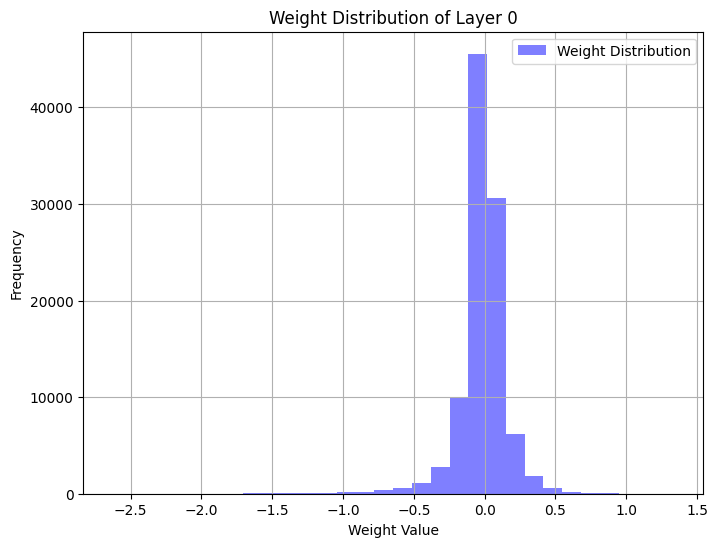

In [ ]:
layer_weights = encoder.layers[1].get_weights()

# Plot the weight distribution
if layer_weights:
    weights = layer_weights[0]

    plt.figure(figsize=(8, 6))
    plt.hist(weights.flatten(), bins=30, alpha=0.5, color='b', label='Weight Distribution')
    plt.title(f'Weight Distribution of Layer {0}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

## Quantization

post quantize input and output to 16 bits width having 14 bits fraction:

In [ ]:
x_train2 = fp_quantize(x_train, 17, 14)
x_test2 = fp_quantize(x_test, 17, 14)
x_train_noisy_2 = fp_quantize(x_train_noisy, 17, 14)
x_test_noisy_2 = fp_quantize(x_test_noisy, 17, 14)

define the quantization model using "qkeras" model:

In [ ]:
input_img = keras.Input(shape=(x_train2.shape[1],))
encoded = QDense(128, kernel_quantizer=quantized_bits(8, 1, alpha=1), bias_quantizer=quantized_bits(8, 1, alpha=1))(input_img)
encoded = QActivation(activation=quantized_relu(8, 1))(encoded)
encoded = QDense(64, kernel_quantizer=quantized_bits(8, 1, alpha=1), bias_quantizer=quantized_bits(8, 1, alpha=1))(encoded)
encoded = QActivation(activation=quantized_relu(8, 1))(encoded)
encoded = QDense(LATENT_SAPCE_DIM, kernel_quantizer=quantized_bits(16, 2, alpha=1), bias_quantizer=quantized_bits(16, 2, alpha=1))(encoded)
encoded = QActivation(activation=quantized_relu(16, 2))(encoded)

decoded = QDense(64, kernel_quantizer=quantized_bits(8, 1, alpha=1), bias_quantizer=quantized_bits(8, 1, alpha=1))(encoded)
decoded = QActivation(activation=quantized_relu(8, 1))(decoded)
decoded = QDense(128, kernel_quantizer=quantized_bits(8, 1, alpha=1), bias_quantizer=quantized_bits(8, 1, alpha=1))(decoded)
decoded = QActivation(activation=quantized_relu(8, 1))(decoded)
decoded = QDense(x_train2.shape[1], kernel_quantizer=quantized_bits(16, 2, alpha=1), bias_quantizer=quantized_bits(16, 2, alpha=1), activation='sigmoid')(decoded)

qautoencoder = keras.Model(input_img, decoded)

train the model (Quantization Aware Training):

In [ ]:
qautoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = qautoencoder.fit(x_train_noisy_2, x_train2,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy_2, x_test2))

Epoch 1/100
235/235 [==============================] - 9s 30ms/step - loss: 0.2870 - val_loss: 0.2179
Epoch 2/100
235/235 [==============================] - 7s 31ms/step - loss: 0.2005 - val_loss: 0.1872
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1811 - val_loss: 0.1734
Epoch 4/100
235/235 [==============================] - 6s 24ms/step - loss: 0.1699 - val_loss: 0.1653
Epoch 5/100
235/235 [==============================] - 8s 34ms/step - loss: 0.1635 - val_loss: 0.1613
Epoch 6/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1591 - val_loss: 0.1564
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1551 - val_loss: 0.1531
Epoch 8/100
235/235 [==============================] - 8s 34ms/step - loss: 0.1523 - val_loss: 0.1500
Epoch 9/100
235/235 [==============================] - 6s 25ms/step - loss: 0.1499 - val_loss: 0.1498
Epoch 10/100
235/235 [==============================] - 5s 22ms/step - loss: 0.148

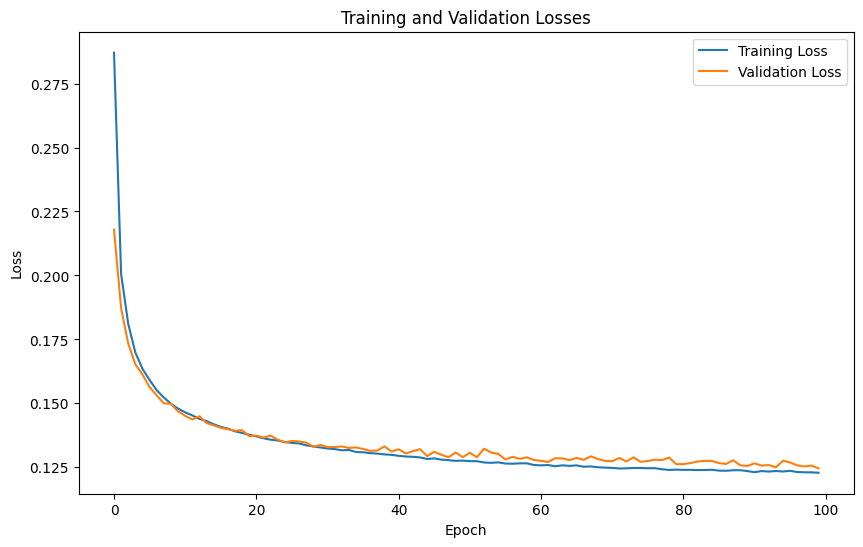

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

define the encoder:

In [ ]:
qencoder = keras.Model(input_img, encoded)

define the decoder:

In [ ]:
encoded_input = keras.Input(shape=(LATENT_SAPCE_DIM,))
# Retrieve the last layer of the autoencoder model
decoder_layer = qautoencoder.layers[-5](encoded_input)
decoder_layer = qautoencoder.layers[-4](decoder_layer)
decoder_layer = qautoencoder.layers[-3](decoder_layer)
decoder_layer = qautoencoder.layers[-2](decoder_layer)
decoder_layer = qautoencoder.layers[-1](decoder_layer)
# Create the decoder model
qdecoder = keras.Model(encoded_input, decoder_layer)

get the outputs of the autoencoder:

In [ ]:
encoded_imgs = qencoder.predict(x_test_noisy_2)
decoded_imgs = qdecoder.predict(encoded_imgs)

313/313 [==============================] - 2s 5ms/step


display the noisy inputs and their corresponding output using the quantized model:

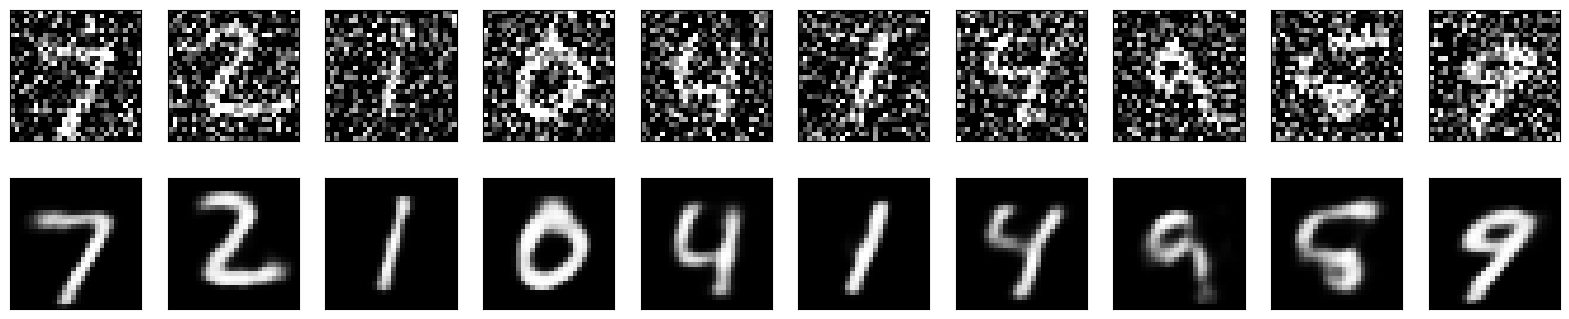

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

save the models:

In [ ]:
autoencoder.save("qautoencoder.h5")
qencoder.save("qencoder.h5")
qdecoder.save("qdecoder.h5")

##############################################################################

# **Save Weights as Fixed Point**

In [ ]:
from qkeras.utils import _add_supported_quantized_objects

co = {}
_add_supported_quantized_objects(co)
qencoder = keras.models.load_model('qencoder.h5', custom_objects=co)
qencoder.compile(optimizer='adam', loss='mse')

In [ ]:
x_test_noisy_2[0]

array([0.15649414, 0.        , 0.09155273, 0.77111816, 0.        ,
       0.09851074, 0.79370117, 0.        , 0.82531738, 0.        ,
       0.69299316, 0.        , 0.21862793, 0.91271973, 0.        ,
       0.        , 0.01806641, 0.05407715, 0.        , 0.        ,
       0.        , 0.        , 0.08282471, 0.56005859, 0.        ,
       0.        , 0.39764404, 0.57550049, 0.        , 0.        ,
       0.        , 0.        , 0.35821533, 0.        , 1.        ,
       0.29766846, 0.        , 0.        , 0.48956299, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.74841309,
       0.14208984, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.46710205, 0.        , 0.        , 0.81781006,
       0.        , 0.37786865, 0.        , 0.08551025, 0.        ,
       0.28430176, 0.83947754, 0.02789307, 0.33862305, 0.        ,
       0.01977539, 0.05725098, 0.87530518, 0.86035156, 0.     

In [ ]:
qencoder.predict(np.array([x_test2[0]]))

1/1 [==============================] - 0s 390ms/step


array([[0.6539917 , 0.        , 0.        , 0.        , 0.5195923 ,
        1.6425781 , 1.0099487 , 0.        , 1.4637451 , 1.473938  ,
        0.        , 1.0397339 , 0.1352539 , 0.        , 1.0484619 ,
        1.3531494 , 2.0026245 , 0.        , 0.        , 0.        ,
        1.1755371 , 3.999939  , 0.38024902, 0.3192749 , 0.        ,
        0.        , 0.        , 1.7606812 , 0.6972046 , 0.        ,
        1.1682129 , 0.        ]], dtype=float32)

In [ ]:
WriteFixPToFile("input.txt", x_test2[0], 17, 14)

In [ ]:
if not os.path.exists('weights'):
    os.mkdir('weights')

In [ ]:
for i, layer in enumerate(qencoder.layers):
    weights = layer.get_weights()
    if weights and len(weights) > 0:
        w_per_neuron = weights[0].shape[0]
        w = np.einsum("ij->ji", weights[0]).reshape(-1,)
        b = weights[1].reshape(-1,)
        separate_weights = [np.concatenate((w[c:c+w_per_neuron], b[int(c/w_per_neuron):int(c/w_per_neuron)+1]), axis=0) for c in range(0, len(w), w_per_neuron)]

        width, f = (17, 14) if layer.name == 'last' else (9, 7)
        for n, s in enumerate(separate_weights):
            WriteFixPToFile(f"weights/layer_{i + 1}_{n + 1}_w.txt", s, width, f)

In [ ]:
def calculate_model_size(neurons_per_layer, bits, quantized_bits):
    original_model_size = sum([neurons_per_layer[i] * neurons_per_layer[i+1] for i in range(len(neurons_per_layer)-1)]) * bits
    quantized_model_size = sum([neurons_per_layer[i] * neurons_per_layer[i+1] for i in range(len(neurons_per_layer)-1)]) * quantized_bits
    original_model_size_kb = original_model_size / 8 / 1024
    quantized_model_size_kb = quantized_model_size / 8 / 1024
    compression = original_model_size_kb / quantized_model_size_kb
    return original_model_size_kb, quantized_model_size_kb, compression

neurons_per_layer = [x_train.shape[1], 128, 64, LATENT_SAPCE_DIM, 64, 128, x_train.shape[1]]

bits = 32
quantized_bits = 17

original_model_size_kb, quantized_model_size_kb, compression = calculate_model_size(neurons_per_layer, bits, quantized_bits)
print(f"Original model size: {original_model_size_kb} KB")
print(f"Quantized model size: {quantized_model_size_kb} KB")
print(f"Compression achieved: {compression}")


Original model size: 864.0 KB
Quantized model size: 459.0 KB
Compression achieved: 1.8823529411764706
